In [6]:
!pip install yolo -q 

In [8]:
!pip install --upgrade keyring
!pip install --upgrade ultralytics

  Attempting uninstall: keyring
    Found existing installation: keyring 8.7
    Uninstalling keyring-8.7:
      Successfully uninstalled keyring-8.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yolo 0.3.2 requires keyring==8.7.0, but you have keyring 25.6.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8

In [20]:
!python "/kaggle/input/driver/train_val_split.py" --datapath="/kaggle/input/driver/yolo/yolo"

Created folder at /kaggle/working/datasets/train/images.
Created folder at /kaggle/working/datasets/train/labels.
Created folder at /kaggle/working/datasets/validation/images.
Created folder at /kaggle/working/datasets/validation/labels.
Number of image files: 193
Number of annotation files: 193
Images moving to train: 154
Images moving to validation: 39


In [22]:
!yolo segment train data="/kaggle/input/driver/data.yaml" model=yolo11s-seg.pt epochs=100 imgsz=640 device=0,1

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/driver/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimize

In [23]:
!yolo segment predict model="/kaggle/working/runs/segment/train8/weights/last.pt" source='/kaggle/input/driver/test/test'

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,068,364 parameters, 0 gradients, 35.3 GFLOPs

image 1/5 /kaggle/input/driver/test/test/1394_jpg.rf.a5b49184110cc442d80e1f9b00d288bd.jpg: 640x640 2 DrowsyEyes, 1 DrowsyMouth, 20.1ms
image 2/5 /kaggle/input/driver/test/test/1411_jpg.rf.f378aca68a7f7f025edb6c4818151e7a.jpg: 640x640 1 Mouth, 20.2ms
image 3/5 /kaggle/input/driver/test/test/1425_jpg.rf.61a7b9337e4469e2ad40aa65c4e53561.jpg: 640x640 1 DrowsyMouth, 2 Eyes, 20.2ms
image 4/5 /kaggle/input/driver/test/test/1430_jpg.rf.876c61c0ce24c3bfc0b023d4015faf5f.jpg: 640x640 2 Eyes, 1 Mouth, 20.2ms
image 5/5 /kaggle/input/driver/test/test/1442_jpg.rf.7791265625f3ac6821f4637d97fac652.jpg: 640x640 1 DrowsyEye, 1 Eye, 1 Mouth, 20.2ms
Speed: 1.8ms preprocess, 20.2ms inference, 39.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/pre

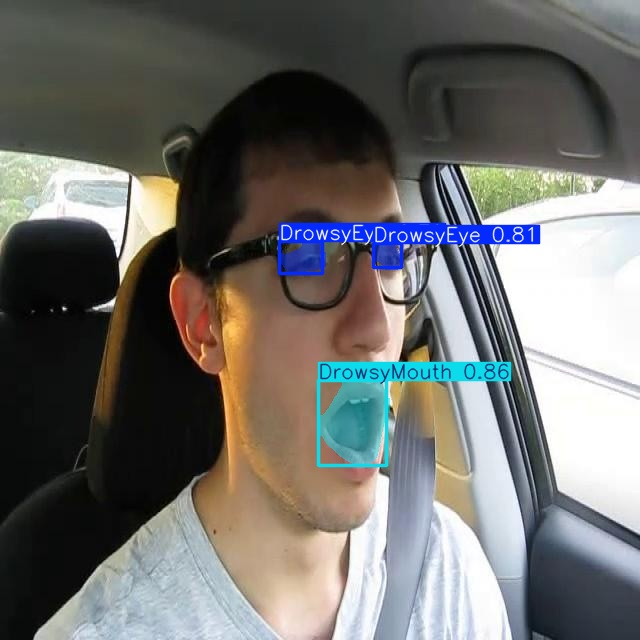

In [33]:
from PIL import Image
from IPython.display import display

image = Image.open("/kaggle/working/runs/segment/predict/1394_jpg.rf.a5b49184110cc442d80e1f9b00d288bd.jpg")
display(image)